In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from immas import classification
from sklearn.utils import shuffle
from sklearn import preprocessing

In [2]:
# Loads the dataset given a file name and splits into two dataframes
# Returns two pandas dataframes
dataset_df1, dataset_df2 = classification.load_features_data('./feature-tables/train-data_1527093743.csv')

Number of images in the dataset 01: 205
Number of images in the dataset 02: 205
Number of regions in dataset 01: 3015
Number of regions in dataset 02: 3361


In [3]:
# Converts from dataframe to numpy array
# Change here (or copy the code) if you want to select only some of the features to the array
# (only texture features, only geomatrical features...)

# Conversion from pandas dataframe to numpy array
# Keeps all the features from the original csv file
Feature = dataset_df1.drop(['class_id','img_name'], axis=1)
Target  = dataset_df1['class_id']
dataset01_data = Feature.as_matrix()
dataset01_labels = Target.as_matrix()

Feature = dataset_df2.drop(['class_id','img_name'], axis=1)
Target  = dataset_df2['class_id']
dataset02_data = Feature.as_matrix()
dataset02_labels = Target.as_matrix()

# Shuflles the datasets and creates one variable with labels for all the samples
dataset01_data, dataset01_labels = shuffle(dataset01_data, dataset01_labels, random_state=None)
dataset02_data, dataset02_labels = shuffle(dataset02_data, dataset02_labels, random_state=None)
all_data = np.vstack((dataset01_data, dataset02_data))
all_labels = np.concatenate((dataset01_labels, dataset02_labels),axis=0)

# Data standardization for each dataset (two methods)
dataset01_data = preprocessing.StandardScaler().fit_transform(dataset01_data)
dataset02_data = preprocessing.StandardScaler().fit_transform(dataset02_data)
all_data = preprocessing.StandardScaler().fit_transform(all_data)
#dataset01_data = preprocessing.robust_scale(dataset01_data)fit_transform
#dataset02_data = preprocessing.robust_scale(dataset02_data)

# Concatenates data and labels of dataset01 into one array
dataset01 = np.zeros((dataset01_data.shape[0],dataset01_data.shape[1]+1));
dataset01[:,:-1] = dataset01_data
dataset01[:,-1] = dataset01_labels

# Concatenates data and labels of dataset02 into one array
dataset02 = np.zeros((dataset02_data.shape[0],dataset02_data.shape[1]+1));
dataset02[:,:-1] = dataset02_data
dataset02[:,-1] = dataset02_labels

## All Without LBP

(3361, 2)
(3361, 1025)


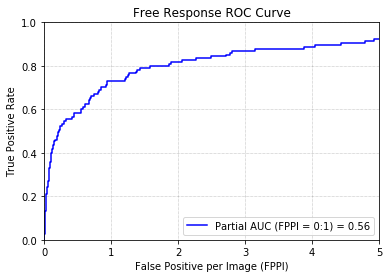

Area under the original ROC curve for our classifier: 0.94
Partial area under the FROC curve for FPPI between 0 and 1: 0.55994


In [4]:
# Run SVM for given two datasets
# Select the kernel and the features used
# Features parameter: 'all_except_LBP', 'all_with_LBP', 'geometrical', 'intensity', 'intensity_no_GLCM', 'lbp'
# Kernel parameter: 'rbf', 'sigmoid', 'linear', 'poly'
# Default parameters: kernel='rbf', features='all_except_LBP'
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='all_except_LBP')

## Geometric Features

(3361, 2)
(3361, 1025)


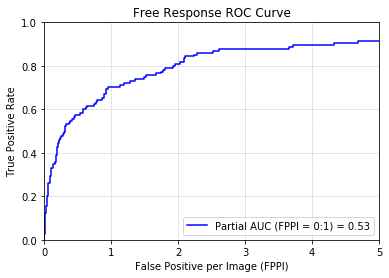

Area under the original ROC curve for our classifier: 0.93
Partial area under the FROC curve for FPPI between 0 and 1: 0.52558


In [5]:
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='geometrical')

## Intensity Features

(3361, 2)
(3361, 1025)


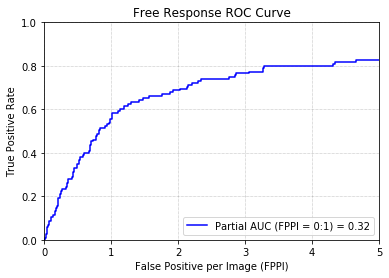

Area under the original ROC curve for our classifier: 0.87
Partial area under the FROC curve for FPPI between 0 and 1: 0.32324


In [6]:
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='intensity')

## Intensity(No GLCM)

(3361, 2)
(3361, 1025)


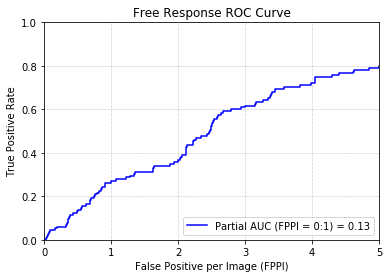

Area under the original ROC curve for our classifier: 0.81
Partial area under the FROC curve for FPPI between 0 and 1: 0.13334


In [7]:
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='intensity_no_GLCM')

## LBP features

(3361, 2)
(3361, 1025)


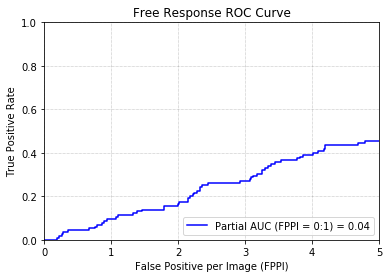

Area under the original ROC curve for our classifier: 0.62
Partial area under the FROC curve for FPPI between 0 and 1: 0.04157


In [8]:
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='lbp')

## ALL features 

(3361, 2)
(3361, 1025)


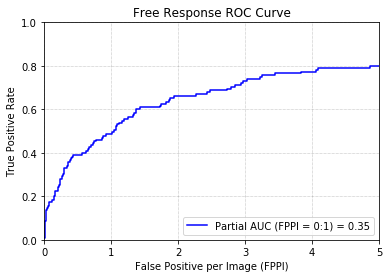

Area under the original ROC curve for our classifier: 0.87
Partial area under the FROC curve for FPPI between 0 and 1: 0.35357


In [10]:
full_probabilities, full_auc, partial_auc, FROC_fpr, FROC_tpr = classification.run_SVM(dataset01, dataset02, kernel='rbf', features='all_with_LBP')